In [49]:
#Split one video into frames:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import webcolors
from sklearn.metrics import mean_squared_error

In [87]:

vidcap = cv2.VideoCapture('/home/jovyan/task1-data-part1/F1_2_4_1.ts')
success,image = vidcap.read()
count = 0
os.mkdir("frames_F1_2_4_1")
while success:
  cv2.imwrite("frames_F1_2_4_1/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1
print("Total %d frames" % count)

Total 1467 frames


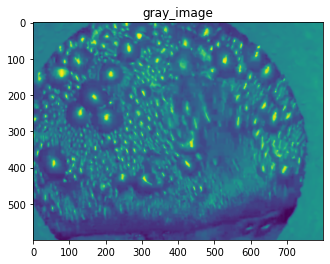

In [3]:
#Image blurring 
gaussdir = "frames_F2_2_2_2_gauss"
if not os.path.exists(gaussdir):
    os.mkdir("frames_F2_2_2_2_gauss")
    os.mkdir("frames_F2_2_2_2_gray")
image = cv2.imread("/home/jovyan/frames_F2_2_2_2/frame99.jpg")
image_gaussian = cv2.GaussianBlur(image,(5,5),0)
cv2.imwrite("frames_F2_2_2_2_gauss/frame99.jpg", image_gaussian) 
image_gray = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2GRAY)
cv2.imwrite("frames_F2_2_2_2_gray/frame99.jpg", image_gray) 
plt.imshow(image_gray)
plt.title('gray_image')
plt.show()

Threshold - 160


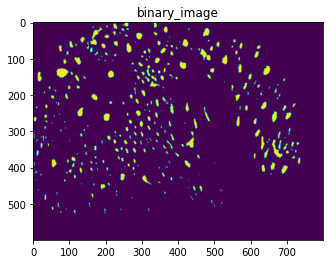

In [4]:
#Image binaryzation
image_binary = None
binarydir = "frames_F2_2_2_2_binary"
if not os.path.exists(binarydir):
    os.mkdir("frames_F2_2_2_2_binary")
threshold, image_binary = cv2.threshold(image_gray,160,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
print("Threshold - %d" % threshold)
cv2.imwrite("frames_F2_2_2_2_binary/frame99.jpg", image_binary) 

plt.imshow(image_binary)
plt.title('binary_image')
plt.show()

In [106]:
#Huff transformation
#rows = image_binary.shape[0]
#circles = cv2.HoughCircles(image_binary, cv2.HOUGH_GRADIENT, 1, 30, param1=100, param2=20, minRadius=1, maxRadius=50)
#print(circles)
#if circles is not None:
#    print("Here")
#    circles = np.uint16(np.around(circles))
#    for i in circles[0, :]:
#        center = (i[0], i[1])
#        # circle center
#        cv2.circle(image_binary, center, 1, (0, 100, 100), 3)
        # circle outline
#        radius = i[2]
#        cv2.circle(image_binary, center, radius, (255, 0, 255), 3)


#cv2.imshow("detected circles", image_gray)


In [100]:
image_gray.shape

(600, 800)

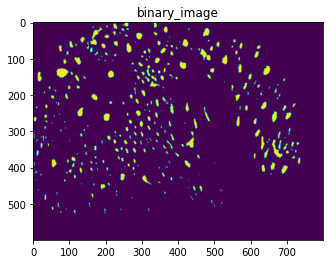

In [108]:
plt.imshow(image_binary)
plt.title('binary_image')
plt.show()

Total centroids 342


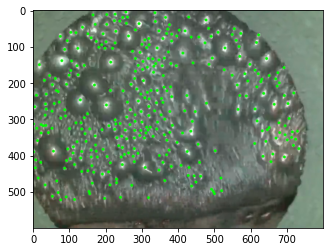

In [4]:
count, labels, stats, centroids = cv2.connectedComponentsWithStats(image_binary)

circled_image = cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB)

image_copy = image.copy()
bound_size = 6

small_images = []
for i in range(1,count):
    #print(stats[i])
    image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])), 1, (0, 255, 0), 5)
    #image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])),  int(bound_size * abs(centroids[i, 1] - stats[i, 1])), (0, 255, 0), 5)
    max_bound = max(abs(centroids[i, 1] - stats[i, 1]), abs(centroids[i, 0] - stats[i, 0]))
    #image_copy = cv2.rectangle(image_copy, (stats[i, 0], stats[i, 1]),  (stats[i, 0] + stats[i, 2], stats[i, 1] + stats[i, 3]), (0, 255, 0), 5)
    small_images.append(image[max(0,int(centroids[i, 1] - bound_size * max_bound)) : 
                                   int(centroids[i, 1] + bound_size * max_bound), 
                                   max(0,int(centroids[i, 0] - bound_size*max_bound)) : 
                                   int(centroids[i, 0] + bound_size*max_bound)])
    #cv2.putText(image_copy, str(i), (int(centroids[i,0]), int(centroids[i,1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0, 255))
    #print(centroids[i, 0] - 4*abs(stats[i, 0]-centroids[i, 0]))
    #print(centroids[i, 0] + 4*abs(stats[i, 0]-centroids[i, 0]))
    #print(centroids[i, 1] - 4 * abs(centroids[i, 1] - stats[i, 1]))
    #print(centroids[i, 1] + 4 * abs(centroids[i, 1] - stats[i, 1]))

print("Total centroids %d" % len(centroids))

plt.imshow(image_copy)
plt.show()

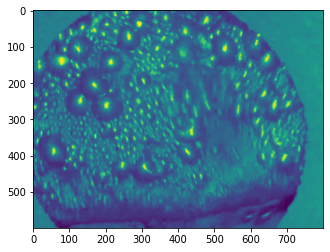

In [8]:
plt.imshow(image_gray)
plt.show()

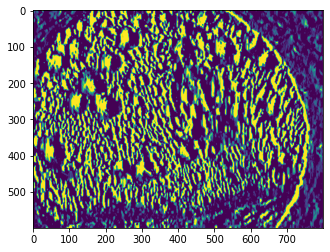

In [140]:
scale = 1
delta = 0
ddepth = cv2.CV_8U
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=5, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow(grad_x)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=5, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

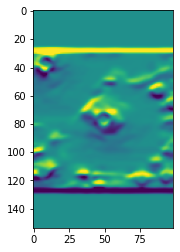

In [110]:
plt.imshow(grad_y)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#plt.imshow(grad)

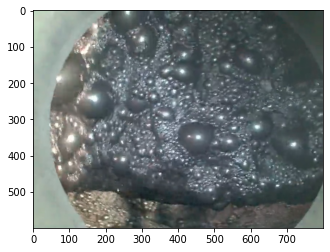

In [101]:
plt.imshow(small_images[0])
plt.show()

None


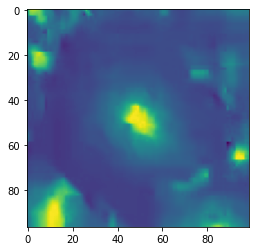

In [31]:
huff_image = small_images[122].copy()
huff_image = cv2.cvtColor(huff_image, cv2.COLOR_BGR2GRAY)
rows = huff_image.shape[0]
circles = cv2.HoughCircles(huff_image, cv2.HOUGH_GRADIENT, 1, 30, param1=100, param2=20, minRadius=1, maxRadius=50)
print(circles)
if circles is not None:
    print("Here")
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(huff_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(huff_image, center, radius, (255, 0, 255), 3)


plt.imshow(huff_image)
plt.show()

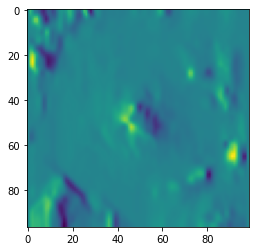

In [38]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(huff_image, ddepth, 1, 0, ksize=5, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow(grad_x)

In [46]:
grad_x[grad_x.shape[0]//2]

array([    0,   -31,    15,    50,    27,   -71,  -266,  -324,  -201,
        -140,  -163,  -158,   -88,     1,    53,    97,   161,   171,
         133,   133,   160,   198,   258,   320,   341,   289,   242,
         255,   252,   261,   350,   408,   377,   358,   396,   436,
         393,   446,   799,  1148,  1436,  1988,  2668,  3081,  2866,
        1971,   911,   220,   -67,  -210,  -279,  -494, -1275, -2015,
       -1885, -1725, -2177, -2240, -1592,  -995,  -767,  -739,  -714,
        -679,  -651,  -563,  -455,  -385,  -339,  -326,  -307,  -239,
        -179,  -144,  -108,   -72,   -40,   -29,   -38,   -46,   -51,
         -57,   -55,   -30,    11,    32,    26,    14,    32,    22,
        -126,  -202,   -53,   146,   386,   580,   442,   129,     0],
      dtype=int16)

In [47]:
grad_x[grad_x.shape[0]//2]#[grad_x.shape[1]//2]

array([    0,   -31,    15,    50,    27,   -71,  -266,  -324,  -201,
        -140,  -163,  -158,   -88,     1,    53,    97,   161,   171,
         133,   133,   160,   198,   258,   320,   341,   289,   242,
         255,   252,   261,   350,   408,   377,   358,   396,   436,
         393,   446,   799,  1148,  1436,  1988,  2668,  3081,  2866,
        1971,   911,   220,   -67,  -210,  -279,  -494, -1275, -2015,
       -1885, -1725, -2177, -2240, -1592,  -995,  -767,  -739,  -714,
        -679,  -651,  -563,  -455,  -385,  -339,  -326,  -307,  -239,
        -179,  -144,  -108,   -72,   -40,   -29,   -38,   -46,   -51,
         -57,   -55,   -30,    11,    32,    26,    14,    32,    22,
        -126,  -202,   -53,   146,   386,   580,   442,   129,     0],
      dtype=int16)

In [3]:
def longest_subsequence(sequence):
    max_neg = 0
    max_pos = 0
    curr_neg = 0
    curr_pos = 0
    #print(sequence)
    for i in range(len(sequence)):
        if sequence[i] < 0:
            curr_neg += 1
            if curr_neg > max_neg:
                max_neg = curr_neg
            curr_pos = 0
        elif sequence[i] > 0:
            curr_pos += 1
            if curr_pos > max_pos:
                max_pos = curr_pos
            curr_neg = 0
        else:
            curr_pos += 1
            if curr_pos > max_pos:
                max_pos = curr_pos
            curr_neg = 0
            
    return max_neg, max_pos
            

In [53]:
longest_subsequence(grad_x[grad_x.shape[0]//2])

[    0   -31    15    50    27   -71  -266  -324  -201  -140  -163  -158
   -88     1    53    97   161   171   133   133   160   198   258   320
   341   289   242   255   252   261   350   408   377   358   396   436
   393   446   799  1148  1436  1988  2668  3081  2866  1971   911   220
   -67  -210  -279  -494 -1275 -2015 -1885 -1725 -2177 -2240 -1592  -995
  -767  -739  -714  -679  -651  -563  -455  -385  -339  -326  -307  -239
  -179  -144  -108   -72   -40   -29   -38   -46   -51   -57   -55   -30
    11    32    26    14    32    22  -126  -202   -53   146   386   580
   442   129     0]


(36, 35)

In [54]:
import math
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

def get_image_with_matches2(my_image, small_images):
    new_gray = my_image.copy()
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    ellipses = []
    for i in range(len(small_images)):#range(150, 151):#range(len(small_images)):#range(148, 150):#range(len(small_images)):
        #print(i)
        try:
            small_image = small_images[i]
            sobel_image = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
            points = []
            max_angle = 0
            max_size = 0
            max_size2 = 0

            for j in range(0,13):
                rotated_image = rotate_image(sobel_image, 15*j)
                rotated_small_image = rotate_image(small_image, 15*j)

                grad_x = cv2.Sobel(rotated_image, ddepth, 1, 0, ksize=7, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                grad_y = cv2.Sobel(rotated_image, ddepth, 0, 1, ksize=7, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                size = np.min(longest_subsequence(grad_x[grad_x.shape[0]//2]))
                size2 = np.min(longest_subsequence(grad_y.T[grad_y.shape[1]//2]))
                #print((15*j, size, size2))
                if size > max_size:
                    max_size = size
                    max_angle = 15*j
                    max_size2 = size2
                #print(max_size)
                #print(max_size2)

                #rotated_small_image = cv2.circle(rotated_small_image, tuple(np.array(rotated_small_image.shape[1::-1]) // 2), int(size), (0, 255, 0), 5)
                #rotated_small_image = cv2.circle(rotated_small_image, (int(centroids[i+1,0]), int(centroids[i+1,1])), int(size), (0, 255, 0), 5)
                #plt.imshow(rotated_image)

                #plt.show()
            #print((int(centroids[i+1,0]), int(centroids[i+1,1])))
            #print(int(max_size), int(max_size2))        
            #print(int(max_angle))        

            #new_gray = cv2.circle(new_gray, (int(centroids[i+1,0]), int(centroids[i+1,1])), int(max_size), (0,255,0), 5)
            if max_size > 10:
                new_gray = cv2.ellipse(new_gray, (int(centroids[i+1,0]), int(centroids[i+1,1])), (int(max_size), int(max_size2)), 180+max_angle, 0, 360, (0,255,0), 2)
                ellipses.append([int(centroids[i+1,0]), int(centroids[i+1,1]), int(max_size), int(max_size2), i])
            #plt.imshow(grad_x)
            #plt.show()
            #print(size)
            #print(size2)
        except:
            continue
    return new_gray, ellipses
    #plt.imshow(new_gray)
    #plt.show()

#print(image)
#print(small_images)


#matched_image = get_image_with_matches2(image, small_images) 


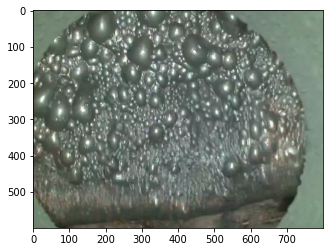

In [53]:
plt.imshow(image)
plt.show()


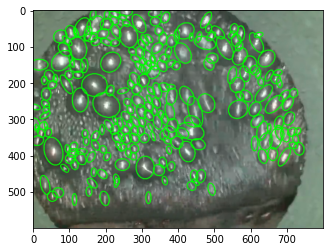

In [8]:
plt.imshow(matched_image)
plt.show()

In [ ]:
def rgb2hex(c):
    return "#{:02x}{:02x}{:02x}".format(int(c[0]), int(c[1]), int(c[2]))  # format(int(c[0]), int(c[1]), int(c[2]))

def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        #print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm


images_to_glue2 = []
for j in range(0,600):
    # print(j)
    image = cv2.imread("/home/jovyan/frames_F1_2_4_1/frame%d.jpg" % j)
    image_gaussian = cv2.GaussianBlur(image,(5,5),0)
    image_gray = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2GRAY)
    threshold, image_binary = cv2.threshold(image_gray,160,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    count, labels, stats, centroids = cv2.connectedComponentsWithStats(image_binary)
    image_copy = image.copy()
    bound_size = 6
    small_images = []
    for i in range(1,count):
        #print(stats[i])
        #image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])), 1, (0, 255, 0), 5)
        #image_copy = cv2.circle(image_copy, (int(centroids[i,0]), int(centroids[i,1])),  int(bound_size * abs(centroids[i, 1] - stats[i, 1])), (0, 255, 0), 5)
        max_bound = max(abs(centroids[i, 1] - stats[i, 1]), abs(centroids[i, 0] - stats[i, 0]))
        #image_copy = cv2.rectangle(image_copy, (stats[i, 0], stats[i, 1]),  (stats[i, 0] + stats[i, 2], stats[i, 1] + stats[i, 3]), (0, 255, 0), 5)
        small_images.append(image[max(0,int(centroids[i, 1] - bound_size * max_bound)) : 
                                       int(centroids[i, 1] + bound_size * max_bound), 
                                       max(0,int(centroids[i, 0] - bound_size*max_bound)) : 
                                       int(centroids[i, 0] + bound_size*max_bound)])
    # print(len(small_images))
    image_with_matches, ellipses = get_image_with_matches2(image, small_images)
    ellipses_np = np.array(ellipses)
    mean_diam = (np.mean(ellipses_np[:,2]) + np.mean(ellipses_np[:,3])) 
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = [0,0,0]
    index = 0
    for ellipse in ellipses:
        try:
            color += image[ellipse[0] + ellipse[2], ellipse[1] + ellipse[3]]
            index += 1
        except:
            continue
    color = color // index
    hex_col = rgb2hex(color)
    color_name = hex2name(color)
    brightness = np.mean(np.take(stats, ellipses_np[:,4] + 1, 0)[:,3])/np.mean(ellipses_np[:,2])
    near_exit = (ellipses_np[:,1] > 400).sum()/float(len(ellipses))
    uniformness = min((ellipses_np[:,0] > 400).sum() / float((ellipses_np[:,0] <= 400).sum()),(ellipses_np[:,0] <= 400).sum() / float((ellipses_np[:,0] > 400).sum()))
    mean_roundness = np.mean(ellipses_np[:,3]/ellipses_np[:,2])
    large_frac = (ellipses_np[:,2] > 20).sum()/float(len(ellipses_np))
    fontScale = 1
    lineType = 2
    image_with_padding = cv2.copyMakeBorder(image_with_matches,0,180,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
    image_with_text = cv2.putText(image_with_padding,'Froth number:   %d' % len(ellipses),  (0, 630), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Mean froth diam: %d' % int(mean_diam),  (0, 670), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Froth color: ' + str(color_name),  (0, 710), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Froth brightness: %.3f' % brightness,  (0, 750), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Near exit rate: %.3f' % near_exit,  (400, 630), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Uniformness: %.3f' % uniformness,  (400, 670), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Mean roundness: %.3f' % mean_roundness,  (400, 710), font, fontScale, [255,255,255], lineType)
    image_with_text = cv2.putText(image_with_text,'Large bubble frac: %.3f' % large_frac,  (400, 750), font, fontScale, [255,255,255], lineType)
    images_to_glue2.append(image_with_padding)


(780, 800, 3)


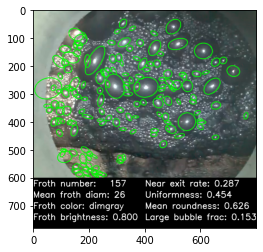

In [91]:
for i in range(len(images_to_glue2)):
    if i == 0:
        print(images_to_glue2[i].shape)
height,width,layers=images_to_glue2[0].shape
#print(images_to_glue[0].shape)
plt.imshow(images_to_glue2[0])
plt.show()
fourcc = cv2.VideoWriter_fourcc('F', 'M', 'P', '4')
out = cv2.VideoWriter('video3.avi',fourcc,20.0,( width, height), True)
for i in range(len(images_to_glue2)):
    out.write(images_to_glue2[i])
out.release()

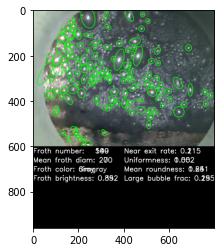

In [92]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
lineType = 2
image_to_pad = images_to_glue2[25]
image_with_padding = cv2.copyMakeBorder(image_to_pad,0,180,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
image_with_text = cv2.putText(image_with_padding,'Froth number:   %d' % 500,  (0, 630), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Mean froth diam: %d' % 200,  (0, 670), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Froth color: Gray',  (0, 710), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Froth brightness: 0.35',  (0, 750), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Near exit rate: 0.1',  (400, 630), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Uniformness: 1.00',  (400, 670), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Mean roundness: 1.25',  (400, 710), font, fontScale, [255,255,255], lineType)
image_with_text = cv2.putText(image_with_padding,'Large bubble frac: 0.25',  (400, 750), font, fontScale, [255,255,255], lineType)

plt.imshow(image_with_text)
plt.show()

In [99]:
from matplotlib.animation import FuncAnimation, writers
dir(writers['ffmpeg'])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_adjust_frame_size',
 '_args',
 '_args_key',
 '_exec_key',
 '_frame_sink',
 '_run',
 'args_key',
 'bin_path',
 'cleanup',
 'exec_key',
 'finish',
 'frame_size',
 'grab_frame',
 'isAvailable',
 'output_args',
 'saving',
 'setup']